In [ ]:
#OIBSIP Data Analytics
#level 1 task no:-2- Customer Segmentation
#Intern name:- Sanjana Gidwani
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/ifood_df.csv')
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [ ]:
columns_to_drop= ['Z_CostContact', 'Z_Revenue']
df=df.drop([col for col in columns_to_drop if col in df.columns], axis=1,inplace=False)
df.ffill(inplace=True)
df['TotalPurchases']=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['TotalSpent']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']


In [ ]:
average_purchase_value=df['TotalSpent'].mean()
purchase_frequency=df['TotalPurchases'].mean()
print(average_purchase_value)
print(purchase_frequency)
df[['Income','Age','TotalSpent','TotalPurchases']].describe()

606.821768707483
14.88798185941043


,Income,Age,TotalSpent,TotalPurchases
count,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,51.095692,606.821769,14.887982
std,20713.063826,11.705801,601.675284,7.615277
min,1730.000000,24.000000,5.000000,0.000000
25%,35196.000000,43.000000,69.000000,8.000000
50%,51287.000000,50.000000,397.000000,15.000000
75%,68281.000000,61.000000,1047.000000,21.000000
max,113734.000000,80.000000,2525.000000,43.000000


In [ ]:
#k-means clustering
features = df[['Income', 'Age', 'TotalSpent', 'TotalPurchases', 'Recency', 'NumWebVisitsMonth']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
df['Cluster'].value_counts()

,count
Cluster,
3,580
1,549
2,539
0,537


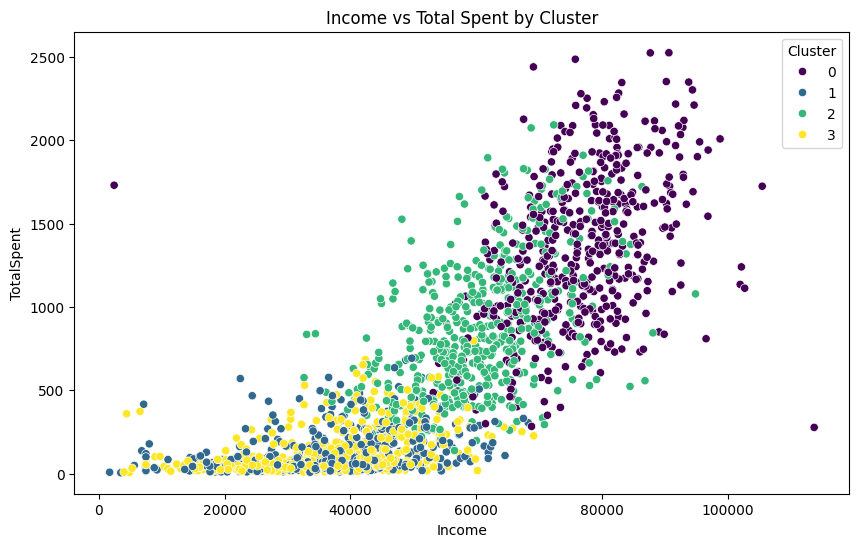

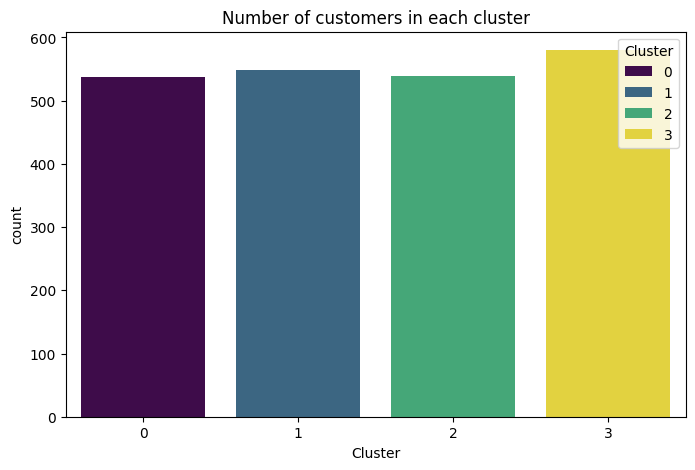

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpent', hue='Cluster', data=df , palette='viridis')
plt.title('Income vs Total Spent by Cluster')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Cluster', data=df, hue='Cluster', palette='viridis')
plt.title('Number of customers in each cluster')
plt.show()

In [ ]:
cluster_analysis= df.groupby('Cluster').mean()[['Income','Age','TotalSpent','TotalPurchases','Recency','NumWebVisitsMonth']]
print(cluster_analysis)

               Income        Age   TotalSpent  TotalPurchases    Recency  \
Cluster                                                                    
0        76679.921788  50.301676  1353.085661       20.206704  50.148976   
1        35905.271403  49.510018   130.650273        8.892532  75.344262   
2        60685.836735  57.515770   864.784787       22.348794  48.224490   
3        34875.760345  47.365517   126.877586        8.705172  23.755172   

         NumWebVisitsMonth  
Cluster                     
0                 2.415270  
1                 6.466302  
2                 5.829314  
3                 6.515517  


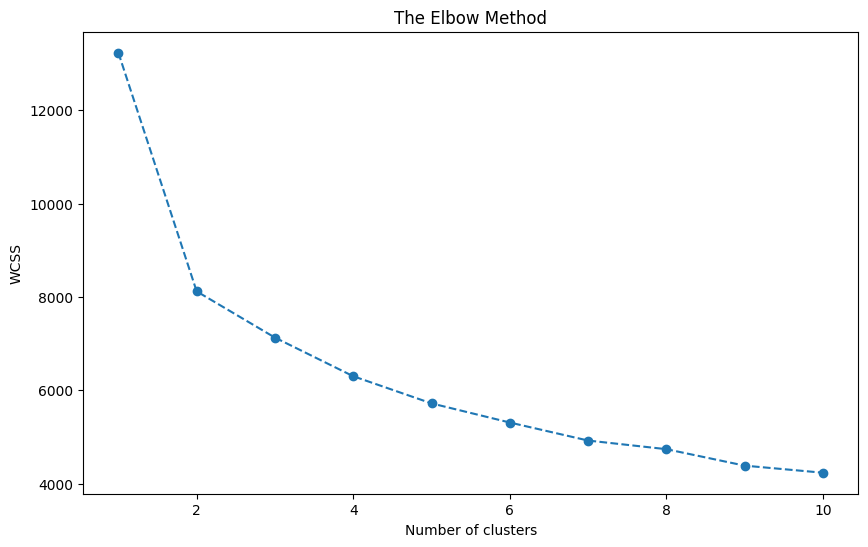

In [ ]:
#elbow method
WCSS=[]
for i in range(1,11):
  Kmeans=KMeans(n_clusters=i,random_state=42)
  Kmeans.fit(scaled_features)
  WCSS.append(Kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11),WCSS,marker='o',linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#silhouette score
from sklearn.metrics import silhouette_score
for n_clusters in range(2,6):
  kmeans=KMeans(n_clusters=n_clusters,random_state=42)
  cluster_labels=kmeans.fit_predict(scaled_features)
  silhouette_avg=silhouette_score(scaled_features,cluster_labels)
  print(f"For n_clusters={n_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3382877874027988
For n_clusters=3, the silhouette score is 0.23929563147291963
For n_clusters=4, the silhouette score is 0.20115382621298702
For n_clusters=5, the silhouette score is 0.20469588596966065


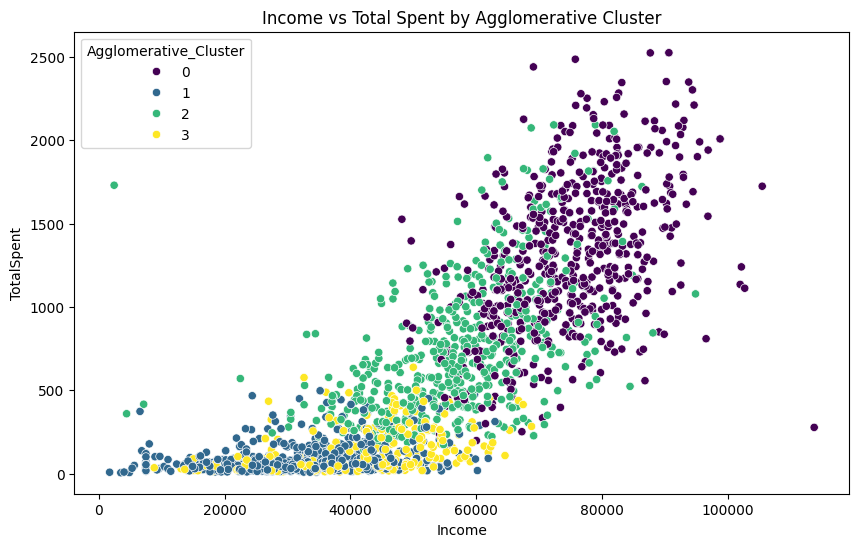

In [ ]:
#agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
agg_cluster=AgglomerativeClustering(n_clusters=4)
df['Agglomerative_Cluster']=agg_cluster.fit_predict(scaled_features)

plt.figure(figsize=(10,6))
sns.scatterplot(x='Income',y='TotalSpent',hue='Agglomerative_Cluster',data=df,palette='viridis')
plt.title('Income vs Total Spent by Agglomerative Cluster')
plt.show()

Cluster
0    27631.482309
1     1626.786885
2    20227.894249
3     1587.567241
Name: CLv, dtype: float64


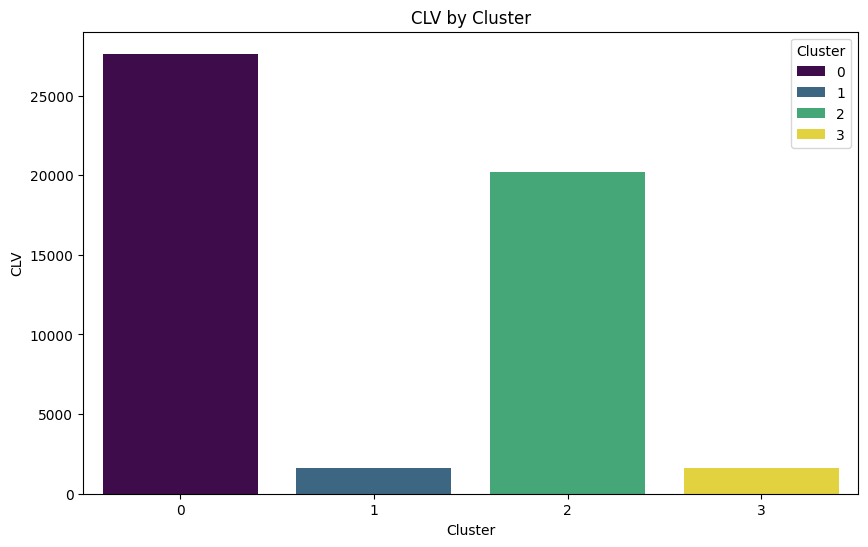

In [ ]:
#clv analysis
df['CLv']=df['TotalSpent']* df['TotalPurchases']
clv_by_cluster=df.groupby('Cluster')['CLv'].mean()
print(clv_by_cluster)

plt.figure(figsize=(10,6))
sns.barplot(x=clv_by_cluster.index,y=clv_by_cluster.values,hue=clv_by_cluster.index, palette='viridis')
plt.title('CLV by Cluster')
plt.xlabel('Cluster')
plt.ylabel('CLV')
plt.show()

   RFM_Score        Income    Recency   TotalSpent  TotalPurchases
0        000  31347.188976  12.307087    36.842520        5.346457
1        001  35222.722222   8.722222   104.722222        6.916667
2        010  25238.416667  12.250000    57.500000        9.666667
3        011  41061.304348  12.760870   191.456522       11.336957
4        012  59962.727273  14.090909   654.818182       13.909091
5        013  78804.800000   7.800000  1592.500000       14.000000
6        021  45260.888889   8.777778   307.388889       16.888889
7        022  58846.080645  10.790323   587.758065       18.580645
8        023  75780.225352  10.267606  1475.436620       18.718310
9        031  59081.000000   4.500000   318.000000       26.000000
10       032  64004.882353  12.941176   817.220588       25.014706
11       033  74221.183673  12.102041  1431.551020       26.081633
12       100  30645.777778  37.037037    38.274074        5.651852
13       101  38908.785714  35.321429    98.357143        7.17

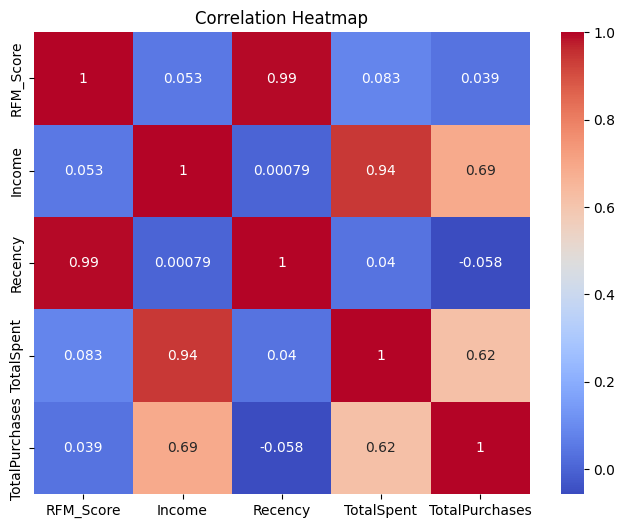

In [ ]:
#rfm analysis
df['RecencyScore']=pd.qcut(df['Recency'],4,labels=False)
df['FrequencyScore']=pd.qcut(df['TotalPurchases'],4,labels=False)
df['MonetaryScore']=pd.qcut(df['TotalSpent'],4,labels=False)

df['RFM_Score']=df['RecencyScore'].astype(str)+df['FrequencyScore'].astype(str)+df['MonetaryScore'].astype(str)
rfm_analysis=df.groupby('RFM_Score').agg({'Income':'mean','Recency':'mean','TotalSpent':'mean','TotalPurchases':'mean'}).reset_index()
print(rfm_analysis)
plt.figure(figsize=(8,6))
sns.heatmap(rfm_analysis.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
X=df[['Income',  'TotalSpent', 'TotalPurchases', 'Recency']]
y=df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       625
           1       0.48      0.35      0.40       103

    accuracy                           0.85       728
   macro avg       0.69      0.64      0.66       728
weighted avg       0.84      0.85      0.84       728

0.8543956043956044


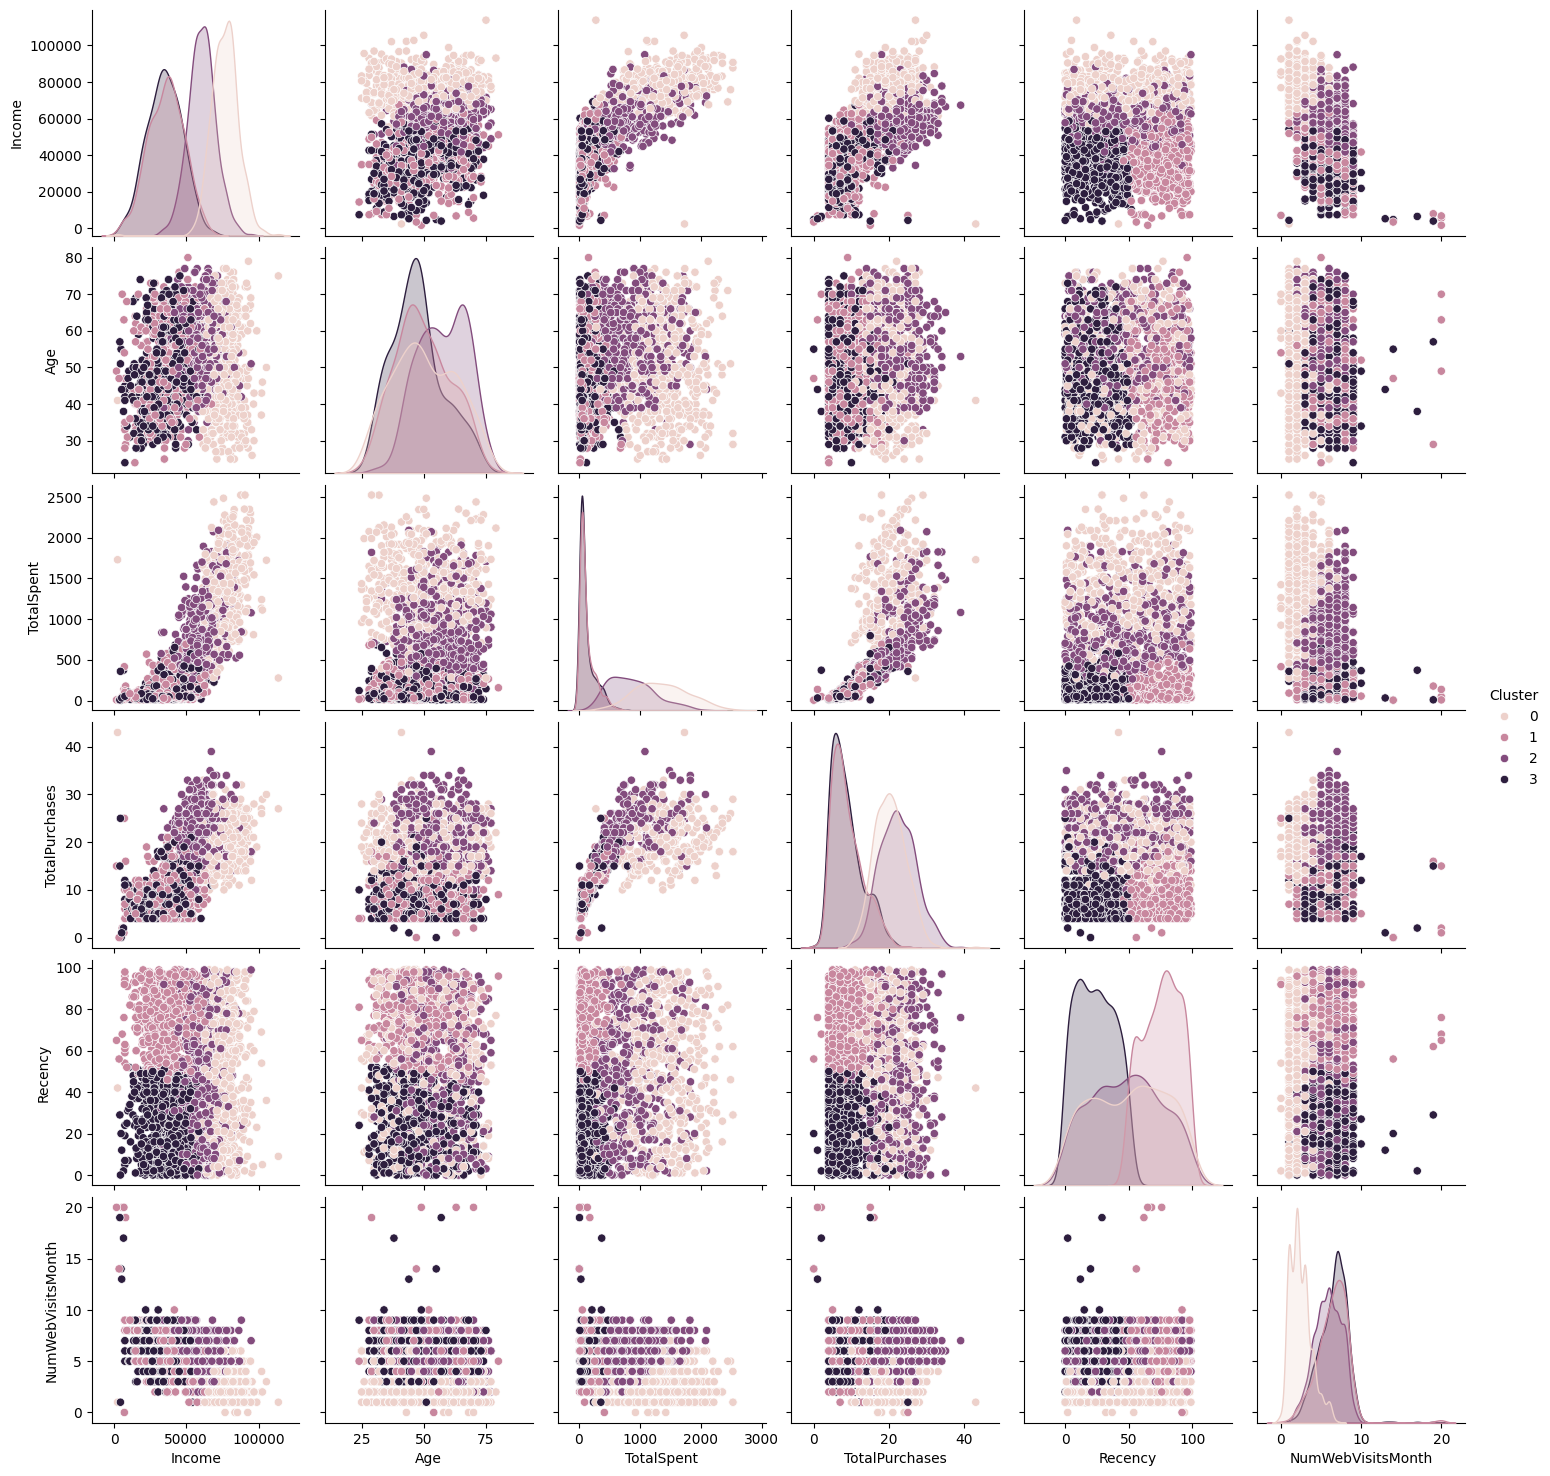

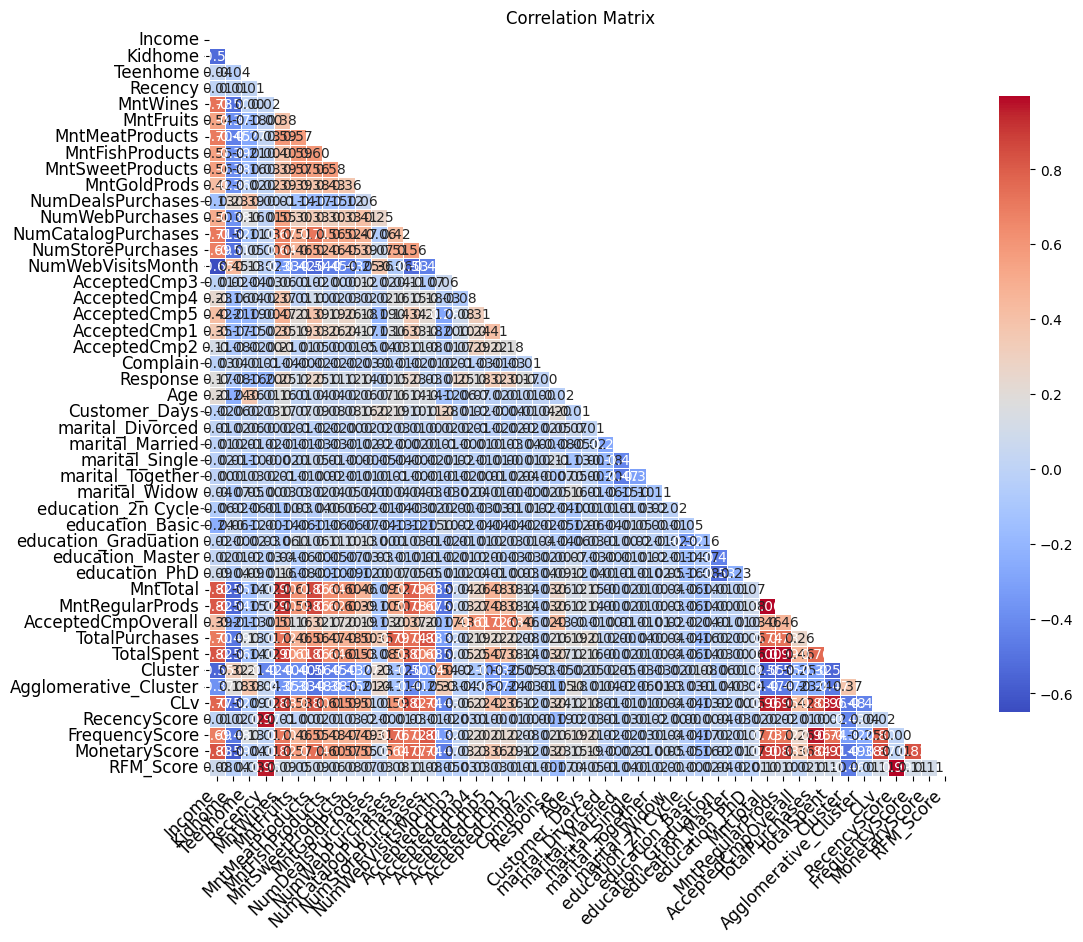

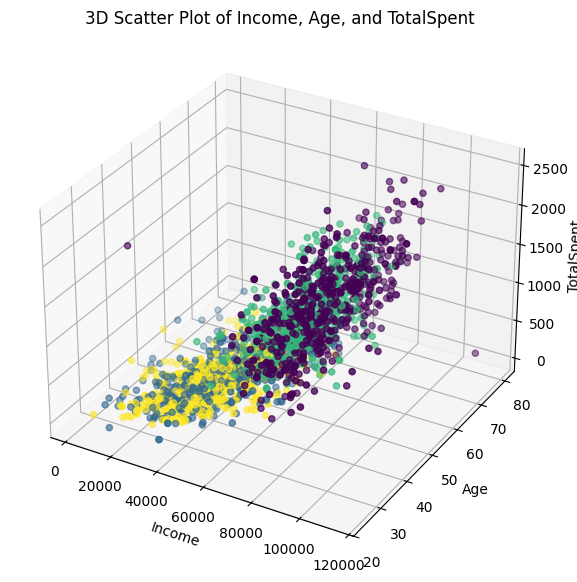

In [ ]:
#pairplot
sns.pairplot(df,hue='Cluster', vars=['Income','Age','TotalSpent','TotalPurchases','Recency','NumWebVisitsMonth'])
plt.show()
plt.figure(figsize=(12,10))
correlation_matrix=df.corr()
mask=np.triu(np.ones_like(correlation_matrix,dtype=bool))
sns.heatmap(correlation_matrix,annot=True,mask=mask,fmt='.2f', cmap='coolwarm', linewidths=.5, square=True, cbar_kws={"shrink": .8},annot_kws={"size":10})
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12)
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Income'], df['Age'], df['TotalSpent'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('TotalSpent')
plt.title('3D Scatter Plot of Income, Age, and TotalSpent')
plt.show()